In [19]:
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import roc_auc_score
import os
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import operator
from typing import Union
from sklearn.preprocessing import MinMaxScaler
import re
import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt

LOAD DATASETS

In [2]:
data_dir="/Users/alexkosa/Desktop/AcLabs"
X_train_unbalanced = pd.read_csv(os.path.join(data_dir, "X_train_unbalanced.csv"))
X_test_unbalanced = pd.read_csv(os.path.join(data_dir, "X_test_unbalanced.csv"))
#path = open("/Users/alexkosa/Desktop/AcLabs/X_train_balanced.csv")
#X_train_balanced=np.loadtxt(path,delimiter=',',dtype='float64',skiprows=1)
X_train_balanced = pd.read_csv(os.path.join(data_dir, "X_train_balanced.csv"))
X_test_balanced = pd.read_csv(os.path.join(data_dir, "X_test_balanced.csv"))

y_train_unbalanced = pd.read_csv(os.path.join(data_dir, "y_train_unbalanced.csv"))
y_test_unbalanced = pd.read_csv(os.path.join(data_dir, "y_test_unbalanced.csv"))
#path = open("/Users/alexkosa/Desktop/AcLabs/y_train_balanced.csv")
#y_train_balanced=np.loadtxt(path,delimiter=',',dtype='float64',skiprows=1)
y_train_balanced = pd.read_csv(os.path.join(data_dir, "y_train_balanced.csv"))
y_test_balanced = pd.read_csv(os.path.join(data_dir, "y_test_balanced.csv"))

In [3]:
y_train_unbalanced = y_train_unbalanced.squeeze()
y_test_unbalanced = y_test_unbalanced.squeeze()
y_train_balanced = y_train_balanced.squeeze()
y_test_balanced = y_test_balanced.squeeze()

LOAD MODELS

In [12]:
catB=CatBoostClassifier()
catU=CatBoostClassifier()
catB=torch.load('CatBoostOnBalancedModel')
catU=torch.load('CatBoostOnUnbalancedModel')
LightGBMResults=torch.load("LightGBMResults")
logB=torch.load('LogisticRegressionOnBalanced')
logU=torch.load('LogisticRegressionOnUnbalanced')

PREDICT

In [15]:
y_predict_catB=catB.predict_proba(X_test_balanced)
y_predict_catU=catU.predict_proba(X_test_unbalanced)
y_predict_logB=logB.predict_proba(X_test_balanced)
y_predict_logU=logU.predict_proba(X_test_unbalanced)

RESULTS

In [17]:
CatBoostResults={"CatBoost On Balanced": roc_auc_score(y_test_balanced,y_predict_catB[:,1]),"CatBoost On Unbalanced":roc_auc_score(y_test_unbalanced,y_predict_catU[:,1])}
LogisticRegressionResults={"LogisticRegression On Balanced":roc_auc_score(y_test_balanced,y_predict_logB[:,1]),"LogisticRegression On Unbalanced": roc_auc_score(y_test_unbalanced,y_predict_logU[:,1])}

In [40]:
print(LogisticRegressionResults)
print(LightGBMResults)
print(CatBoostResults)

{'LogisticRegression On Balanced': 0.8325474684837768, 'LogisticRegression On Unbalanced': 0.8182526376613838}
{'LightGBM On Balanced': 0.9346706358985789, 'LightGBM On Unbalanced': 0.9224645487560548}
{'CatBoost On Balanced': 0.985761328776019, 'CatBoost On Unbalanced': 0.9356364592068797}


PLOT RESULTS

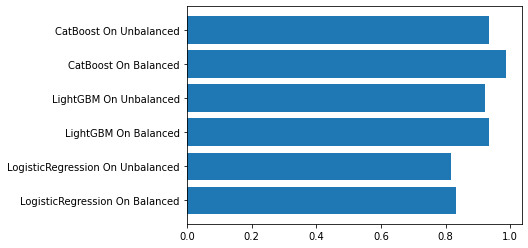

In [33]:
Results={}
Results.update(LogisticRegressionResults)
Results.update(LightGBMResults)
Results.update(CatBoostResults)
names=list(Results.keys())
values=list(Results.values())
plt.barh(range(len(Results)),values,tick_label=names)
plt.show()

PLOT ROC

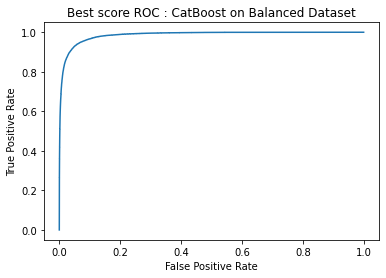

In [35]:
fpr, tpr, _ = metrics.roc_curve(y_test_balanced,  y_predict_catB[:,1])
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Best score ROC : CatBoost on Balanced Dataset")
plt.show()

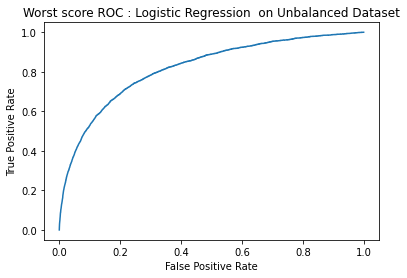

In [41]:
fpr, tpr, _ = metrics.roc_curve(y_test_unbalanced,  y_predict_logU[:,1])
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Worst score ROC : Logistic Regression  on Unbalanced Dataset")
plt.show()

FEATURE IMPORTANCE ON BEST MODEL

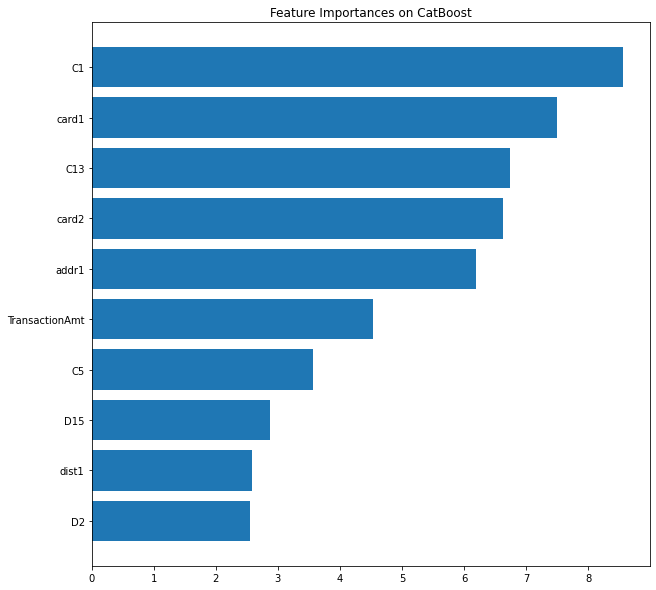

In [45]:
features = X_train_balanced.columns
importances = catB.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances on CatBoost')
plt.barh(range(10), importances[indices[-10:]])
plt.yticks(range(10),[features[i] for i in indices[-10:]])
plt.show()

FEATURE IMPORTANCE ON WORST MODEL

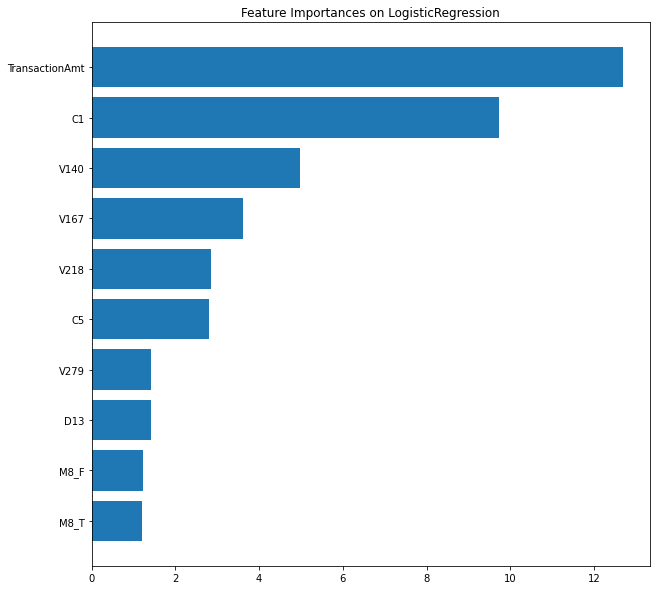

In [51]:
features = X_train_balanced.columns
importances = logU.coef_[0]
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances on LogisticRegression')
plt.barh(range(10), importances[indices[-10:]])
plt.yticks(range(10),[features[i] for i in indices[-10:]])
plt.show()